In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [78]:
data = pd.read_csv('Top Indian Places to Visit.csv')

In [79]:
data.shape

(325, 16)

In [80]:
data.head()

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        325 non-null    int64  
 1   Zone                              325 non-null    object 
 2   State                             325 non-null    object 
 3   City                              325 non-null    object 
 4   Name                              325 non-null    object 
 5   Type                              325 non-null    object 
 6   Establishment Year                325 non-null    object 
 7   time needed to visit in hrs       325 non-null    float64
 8   Google review rating              325 non-null    float64
 9   Entrance Fee in INR               325 non-null    int64  
 10  Airport with 50km Radius          325 non-null    object 
 11  Weekly Off                        32 non-null     object 
 12  Signific

In [82]:
data.describe()

,Unnamed: 0,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Number of google review in lakhs
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,162.000000,1.807692,4.486154,115.809231,0.408438
std,93.963645,0.971398,0.274580,530.859785,0.646668
min,0.000000,0.500000,1.400000,0.000000,0.010000
25%,81.000000,1.000000,4.400000,0.000000,0.059000
50%,162.000000,1.500000,4.500000,0.000000,0.170000
75%,243.000000,2.000000,4.600000,40.000000,0.500000
max,324.000000,7.000000,4.900000,7500.000000,7.400000


# Data Visualization

Google review rating

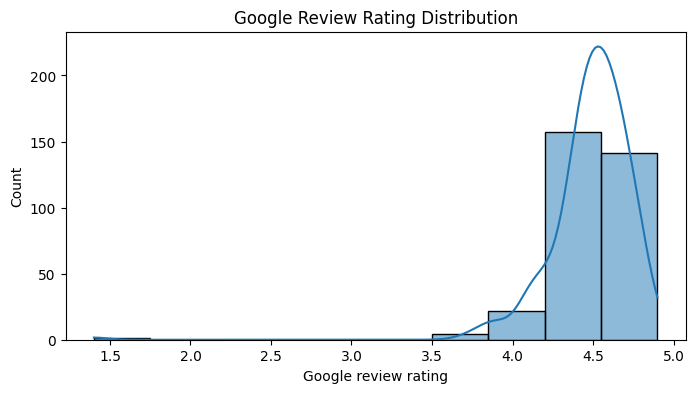

In [83]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Google review rating'], bins=10, kde=True)
plt.title("Google Review Rating Distribution")
plt.show()

time needed to visit in hrs

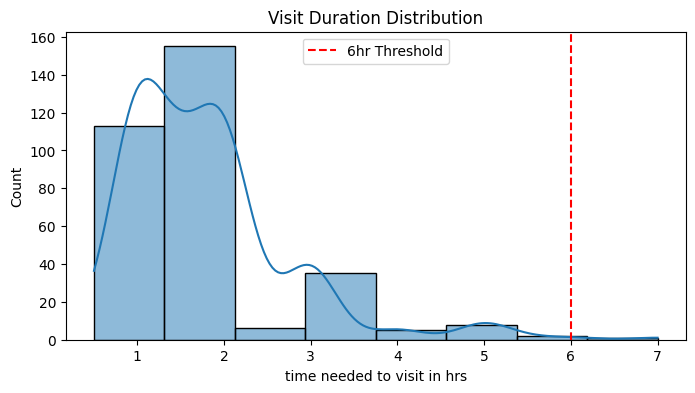

In [84]:
plt.figure(figsize=(8, 4))
sns.histplot(data['time needed to visit in hrs'], bins=8, kde=True)
plt.axvline(6, color='red', linestyle='--', label='6hr Threshold')
plt.title("Visit Duration Distribution")
plt.legend()
plt.show()

Entrance Fee vs Google Rating

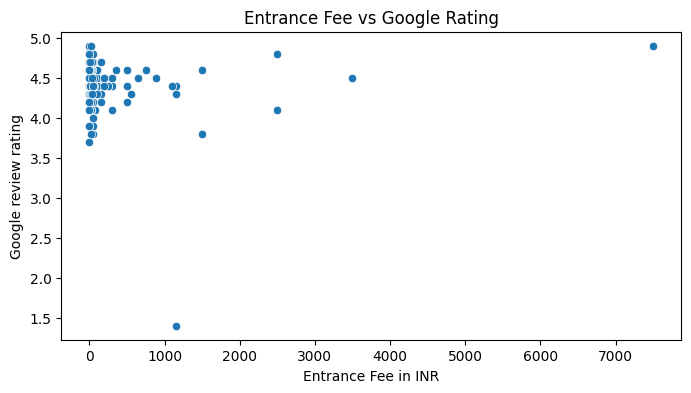

In [85]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Entrance Fee in INR', y='Google review rating', data=data)
plt.title("Entrance Fee vs Google Rating")
plt.show()

# **Data Analysis and Feature Engineering**


# Numerical Features

In [86]:
data.columns

Index(['Unnamed: 0', 'Zone', 'State', 'City', 'Name', 'Type',
       'Establishment Year', 'time needed to visit in hrs',
       'Google review rating', 'Entrance Fee in INR',
       'Airport with 50km Radius', 'Weekly Off', 'Significance',
       'DSLR Allowed', 'Number of google review in lakhs',
       'Best Time to visit'],
      dtype='object')

In [87]:
data['Google review rating'].describe()

count    325.000000
mean       4.486154
std        0.274580
min        1.400000
25%        4.400000
50%        4.500000
75%        4.600000
max        4.900000
Name: Google review rating, dtype: float64

In [88]:
data['Entrance Fee in INR'].describe()

count     325.000000
mean      115.809231
std       530.859785
min         0.000000
25%         0.000000
50%         0.000000
75%        40.000000
max      7500.000000
Name: Entrance Fee in INR, dtype: float64

In [89]:
data['Number of google review in lakhs'].describe()

count    325.000000
mean       0.408438
std        0.646668
min        0.010000
25%        0.059000
50%        0.170000
75%        0.500000
max        7.400000
Name: Number of google review in lakhs, dtype: float64

In [90]:
data['Number of Google Reviews'] = data['Number of google review in lakhs'].astype(float) * 1e5

In [91]:
# Normalize ratings (0-1 scale)
data['Normalized Rating'] = data['Google review rating'] / 5  

# Normalize Entrance Fee 
data['Normalized Fee'] = 1 - (data['Entrance Fee in INR'] / max(data['Entrance Fee in INR']))

# Normalize Time Needed (Assuming max = 24 hours)
data['Normalized Time'] = 1 - (data['time needed to visit in hrs'] / max(data['time needed to visit in hrs']))

# Normalize Number of Reviews 
data['Normalized Reviews'] = data['Number of Google Reviews'] / max(data['Number of Google Reviews'])

# Categorical Feature Analysis

Weekly Off

In [92]:
data['Weekly Off'].value_counts()

Weekly Off
Monday     23
Friday      5
Sunday      2
Yes         1
Tuesday     1
Name: count, dtype: int64

In [93]:
def weekly_off_penalty(weekly_off):
    if pd.isna(weekly_off):  
        return 1  
    elif 'Saturday' in weekly_off and 'Sunday' in weekly_off:
        return 0  
    elif 'Saturday' in weekly_off or 'Sunday' in weekly_off:
        return 0.5  
    else:
        return 1

data['Weekend Availability Score'] = data['Weekly Off'].apply(weekly_off_penalty)

Significance

In [94]:
data['Significance'].value_counts()

Significance
Historical            78
Religious             75
Nature                47
Recreational          30
Wildlife              29
Cultural              13
Scenic                10
Shopping               7
Entertainment          5
Adventure              5
Architectural          4
Botanical              3
Environmental          2
Natural Wonder         2
Artistic               2
Educational            2
Sports                 2
Scientific             2
Spiritual              1
Archaeological         1
Agricultural           1
Engineering Marvel     1
Market                 1
Trekking               1
Food                   1
Name: count, dtype: int64

In [95]:
significance_weights = {
    'Historical': 0.3,
    'Religious': 0.2,
    'Nature': 0.3,   
    'Recreational': 0.25,
    'Wildlife': 0.25,
    'Adventure': 0.35, 
    'Cultural': 0.15,
    'Architectural': 0.15,
    'Entertainment': 0.15,
    'Natural Wonder': 0.2,
    'Archaeological': 0.15,
    'Agricultural': 0.05,
    'Market': 0.05,
    'Trekking': 0.3,
    'Food': 0.05
}

# Assign Significance Score
data['Significance Score'] = data['Significance'].map(significance_weights).fillna(0.1)


Type

In [96]:
data['Type'].value_counts()

Type
Temple              59
Beach               25
Fort                22
Lake                16
National Park       14
                    ..
Vineyard             1
Temples              1
Prehistoric Site     1
Scenic Point         1
Race Track           1
Name: count, Length: 78, dtype: int64

In [97]:
type_weights = {
    'Beach': 0.4,
    'Temple': 0.4,
    'National Park': 0.4,
    'Lake': 0.2,
    'Theme Park': 0.2,
    'Fort': 0.3
}
data['Type Score'] = data['Type'].map(type_weights).fillna(0.1)

Airport Score

In [98]:
data['Airport Score'] = data['Airport with 50km Radius'].apply(lambda x: 0.05 if x == 'Yes' else 0)

# **Ranking Algorithm**


In [105]:
def calculate_score(row):
    return (
        0.25 * row['Normalized Rating'] +
        0.30 * row['Normalized Time'] +
        0.15 * row['Normalized Fee'] +
        0.10 * row['Normalized Reviews'] +
        0.05 * row['Airport Score'] +
        0.10 * row['Weekend Availability Score'] +  
        0.05 * row['Significance Score'] +  
        0.05 * row['Type Score']
    )

data['Ranking Score'] = data.apply(calculate_score, axis=1)
data = data.sort_values(by='Ranking Score', ascending=False)


**Save Processed Data With Rank**

In [106]:
data.to_csv('processed.csv', index=False)

# **Recommendation System**

In [ ]:
def recommend_places(city, top_n=5):
    city_places = data[data['City'].str.lower() == city.lower()].copy()
    if city_places.empty:
        return f"No places found for {city}."

    city_places = city_places.sort_values(by='Ranking Score', ascending=False)
    
    return city_places[['Name', 'City', 'Ranking Score', 'Google review rating',
                        'time needed to visit in hrs', 'Entrance Fee in INR', 'Significance']].head(top_n)


# **Testing**

In [102]:
city_name = "Mumbai"
pd.DataFrame(recommend_places(city_name))


,Name,City,Ranking Score,Google review rating,time needed to visit in hrs,Entrance Fee in INR,Significance
17,Gateway of India,Mumbai,0.808292,4.6,1.0,0,Historical
21,Mahalaxmi Temple,Mumbai,0.779102,4.7,1.0,0,Religious
18,Chhatrapati Shivaji Maharaj Vastu Sangrahalaya,Mumbai,0.754237,4.6,1.0,500,Historical
20,Siddhivinayak Temple,Mumbai,0.750975,4.8,2.0,0,Religious
16,Marine Drive,Mumbai,0.722056,4.5,2.0,0,Scenic
